# Working with brainsight module

In [2]:
from pynetstim.brainsight import BrainsightProject, chunk_samples, plot_chunks
from pynetstim.plotting import plotting_points
from surfer import Brain
from mayavi import mlab 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pymisc.plotting import clean_plot

/anaconda3/envs/neuroimage-py3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Brainsight project

In [3]:
subject = 'example_subject'
freesurfer_dir = './example_data'
project_dir = './example_data/out_dir'
brainsight_file = './example_data/example_brainsight.txt'.format(subject=subject)

project = BrainsightProject(subject, freesurfer_dir = freesurfer_dir,
                      project_dir= project_dir, 
                      brainsight_file = brainsight_file,
                      overwrite='all')

project.summary(plot_pulses=False)

/anaconda3/envs/neuroimage-py3/lib/python3.7/site-packages/pynetstim/brainsight.py:336: ResourceWarning: unclosed file <_io.TextIOWrapper name='./example_data/out_dir/example_subject/logs/log.txt' mode='r' encoding='UTF-8'>
  previous_logs = open('{subject_dir}/logs/log.txt'.format(subject_dir = self.subject_dir),'r').read().split('\n')[0:-1]
/anaconda3/envs/neuroimage-py3/lib/python3.7/site-packages/pynetstim/brainsight.py:50: ResourceWarning: unclosed file <_io.TextIOWrapper name='./example_data/example_brainsight.txt' mode='r' encoding='UTF-8'>
  self.f = open(self.bs_session_file,'r').read().split('\n')
/anaconda3/envs/neuroimage-py3/lib/python3.7/site-packages/pynetstim/brainsight.py:146: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  self._df = pd.read_table(self.samples_file)


Target
Sample
Electrode
Planned
Session
head model exists, if you want to recreate the head models, remove the directory:
./example_data/example_subject/bem


/anaconda3/envs/neuroimage-py3/lib/python3.7/site-packages/pynetstim/coordinates.py:247: ResourceWarning: unclosed file <_io.TextIOWrapper name='./example_data/example_subject/mri/transforms/talairach.xfm' mode='r' encoding='UTF-8'>
  f = open(fname,'r').read().split('\n')


#### samples and targets

In [4]:
targets = project.brainsight_targets
samples = project.brainsight_samples

In [5]:
print('## Target Names ##\n')
print(targets.name)

## Target Names ##

['R_DLPFC' 'R_Occ' 'L_DLPFC' 'L_IPL' 'V1_M1_1' 'V1_M1_2' 'V1_M1_3' 'c_Occ'
 'c_R_DLPFC' 'c_DAN' 'I_DAN' 'ICA_DAN' 'C_Def' 'I_Def' 'ICA_Def' 'V2_M1_1'
 'V2_M1_2' 'V2_M1_3' 'V2_M1_4' 'Sample 46' 'Sample 50' 'Sample 52'
 'Sample 78' 'V4_M1_1' 'V4_M1_2' 'V4_m1_3' 'v4_M1_4' 'Sample 2085'
 'V4_M1_5' 'V5_M1_1' 'V6_M1_1' 'V6_M1_2' 'V6_M1_3' 'V6_M1_4']


In [6]:
### getting samples for L_DLPFC
ldlpfc_samples = samples.get_target_stims('L_DLPFC')
ldlpfc_samples.head()

,sample_name,session_name,index,assoc_target,loc_x,loc_y,loc_z,m0n0,m0n1,m0n2,...,target_error,angular_error,twist_error,stim_power,date,time,creation_cause,crosshairs_driver,offset,comment
0,Sample 1,Session 1,1,L_DLPFC,-51.621,16.756,90.272,0.619,-0.435,0.654,...,45.470,24.556,27.447,(null),2018-03-22,14:17:43.793,TTL2,Broad - CT210,0.0,(null)
1,Sample 2,Session 1,2,L_DLPFC,-50.824,14.926,90.438,0.571,-0.459,0.680,...,49.236,22.121,24.204,(null),2018-03-22,14:17:49.104,TTL2,Broad - CT210,0.0,(null)
2,Sample 3,Session 1,3,L_DLPFC,-48.014,13.790,92.569,0.573,-0.487,0.659,...,50.508,21.528,22.823,(null),2018-03-22,14:18:06.976,TTL2,Broad - CT210,0.0,(null)
3,Sample 4,Session 1,4,L_DLPFC,-47.989,13.931,92.499,0.566,-0.497,0.658,...,51.273,19.560,21.841,(null),2018-03-22,14:18:11.635,TTL2,Broad - CT210,0.0,(null)
4,Sample 5,Session 1,5,L_DLPFC,-40.031,12.046,99.932,0.539,-0.573,0.617,...,54.311,20.525,17.314,(null),2018-03-22,14:18:31.412,TTL2,Broad - CT210,0.0,(null)


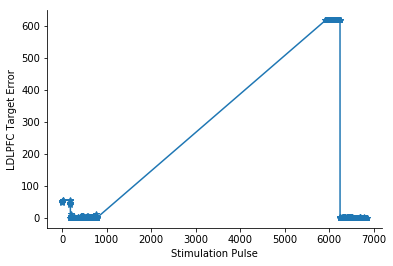

In [7]:
### plotting samples target errors
fig,ax = plt.subplots()
ax.plot(ldlpfc_samples.target_error,'*-')
ax.set_xlabel('Stimulation Pulse')
ax.set_ylabel('LDLPFC Target Error')
fig,ax = clean_plot(fig,ax)

As the jumps in the plot shows, LDLPFC has been stimulated at different sessions. We can chunk the samples. 

[0, 7, 13, 163, 463, 465, 615, 944, 1093, 1393, 1542]


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x106172c18>)

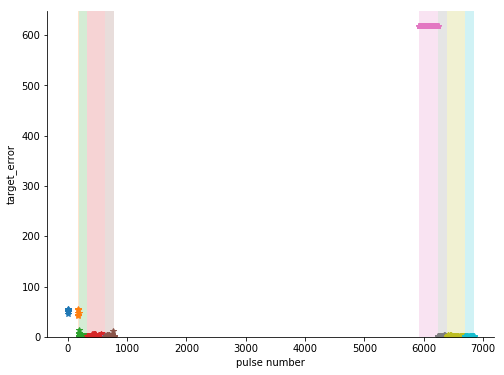

In [8]:
chunks = chunk_samples(ldlpfc_samples, thr=50)
plot_chunks(chunks)

## visualization of stimulations

In [9]:
names_to_plot = ['R_DLPFC', 'R_Occ', 'L_DLPFC', 'L_IPL', 'V1_M1_1', 'V1_M1_2', 'c_Occ',
 'c_R_DLPFC', 'c_DAN', 'I_DAN', 'ICA_DAN', 'C_Def', 'I_Def', 'ICA_Def']


### subseting targets based on name 
targets_to_plot = targets.subset('name',names_to_plot)

In [10]:
p = plotting_points(targets_to_plot,hemi='both',surf='white',map_surface='pial',
                show_roi=True,show_name=True,scale_factor=1,name_scale=4,
               opacity=1,annot='Yeo2011_7Networks_N1000',show_plot=False)
p._brain.save_imageset('sample_',views=['dor','med','lat'])


['sample__dor.png', 'sample__med.png', 'sample__lat.png']

![title](sample__dor.png)